<a href="https://colab.research.google.com/github/waqas-manzoor5595/Machine_learning_projects-b-/blob/main/Linear%2BRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read in the data:

In [ ]:
import pandas as pd
credit_df = pd.read_csv(r"/content/MyCreditData.csv")
credit_df.head()

,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,other_debtors,present_residence,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,gender,profit
0,3,18,0,2,1049,4,2,2,2,3,...,21,1,0,0,1,0,0,0,female,242
1,3,9,0,5,2799,4,0,1,2,0,...,36,1,0,1,1,1,0,0,male,596
2,0,12,4,8,841,0,1,1,2,3,...,23,1,0,0,3,0,0,0,female,25
3,3,12,0,5,2122,4,0,0,2,0,...,39,1,0,1,3,1,0,1,male,568
4,3,12,0,5,2171,4,0,2,2,3,...,38,0,2,1,3,0,0,1,male,782


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account         1000 non-null   int64 
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   int64 
 3   purpose                  1000 non-null   int64 
 4   amount                   1000 non-null   int64 
 5   savings_account          1000 non-null   int64 
 6   employment_duration      1000 non-null   int64 
 7   installment_rate         1000 non-null   int64 
 8   other_debtors            1000 non-null   int64 
 9   present_residence        1000 non-null   int64 
 10  property                 1000 non-null   int64 
 11  age                      1000 non-null   int64 
 12  other_installment_plans  1000 non-null   int64 
 13  housing                  1000 non-null   int64 
 14  number_credits           1000 non-null   

Let's take care of the necessary data manipulations:

In [ ]:
# ensure Python reads the categorical variables as categorical (instead of as int)
non_categorical_columns = ['duration', 'amount', 'age', 'profit']
for column in credit_df.columns:
    if column not in non_categorical_columns:
        credit_df[column] = pd.Categorical(credit_df[column])

Our goal is to predict *profit* using all available information. We first split up the credit data into independent and dependent variables, and 70% training and 30% testing data:

In [ ]:
y = credit_df['profit']
X = credit_df.iloc[:, :-1] # All columns but the last one, profit

# Use dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True).astype(float)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 1)



End of video challenge: Lets double check that we have the right number of records in the training and validation sets

In [ ]:
len(X_train.index)
len(X_val.index)

300

 We run a full linear regression:

In [ ]:
import statsmodels.api as sm
lin_reg_model = sm.OLS(y_train, sm.add_constant(X_train)) # This package requires explicit adding of a constant term
lin_reg_results = lin_reg_model.fit()
lin_reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.504
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.04e-20
Time:                        11:39:11   Log-Likelihood:                -5854.4
No. Observations:                 700   AIC:                         1.182e+04
Df Residuals:                     646   BIC:                         1.206e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          177.0458    521.753      0.339      0.734    -847.491    1201.582
duration                         5.9249      4.992      1.187      0.236      -3.878      15.728
amount                          -0.1645      0.023     -7.067      0.000      -0.210      -0.119
age                             -4.7354      4.426     -1.070      0.285     -13.426       3.955
checking_account_1             383.5347    109.809      3.493      0.001     167.909     599.160
checking_account_2             272.9559    194.404      1.404      0.161    -108.783     654.695
checking_account_3              -0.3159    120.379     -0.003      0.998    -236.697     236.065
credit_history_1              -425.2826    231.296     -1.839      0.066    -879.465      28.899
credit_history_2              -355.7708    225.001     -1.581      0.114    -797.592      86.050
credit_history_3               214.6914    163.793      1.311      0.190    -106.940     536.322
credit_history_4              -288.1258    123.738     -2.329      0.020    -531.103     -45.148
purpose_1                      795.4233    408.957      1.945      0.052      -7.622    1598.468
purpose_2                      453.9388    409.175      1.109      0.268    -349.535    1257.412
purpose_3                       38.8300    488.921      0.079      0.937    -921.237     998.897
purpose_4                      337.9475    408.479      0.827      0.408    -464.159    1140.054
purpose_5                      156.0686    402.992      0.387      0.699    -635.263     947.400
purpose_6                      290.4959    560.814      0.518      0.605    -810.743    1391.735
purpose_7                       58.9631    446.982      0.132      0.895    -818.751     936.677
purpose_8                      201.9848    418.864      0.482      0.630    -620.514    1024.483
purpose_9                      237.4508    548.159      0.433      0.665    -838.938    1313.840
savings_account_1              306.9933    164.222      1.869      0.062     -15.479     629.466
savings_account_2             -191.4130    216.874     -0.883      0.378    -617.275     234.449
savings_account_3               52.1145    233.507      0.223      0.823    -406.410     510.639
savings_account_4              -71.2509    144.841     -0.492      0.623    -355.666     213.165
employment_duration_1          292.4289    126.496      2.312      0.021      44.036     540.822
employment_duration_2          -24.9067    129.955     -0.192      0.848    -280.092     230.279
employment_duration_3          -80.0715    127.756     -0.627      0.531    -330.939     170.797
employment_duration_4          128.3469    210.097      0.611      0.541    -284.209     540.903
installment_rate_1             102.4281    140.592      0.729      0.467    

In [ ]:
import numpy as np
p = 1/ (1+ np.exp(-6.2904))
p

0.9981494128310379

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 731 to 37
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      700 non-null    float64
 1   amount                        700 non-null    float64
 2   age                           700 non-null    float64
 3   checking_account_1            700 non-null    float64
 4   checking_account_2            700 non-null    float64
 5   checking_account_3            700 non-null    float64
 6   credit_history_1              700 non-null    float64
 7   credit_history_2              700 non-null    float64
 8   credit_history_3              700 non-null    float64
 9   credit_history_4              700 non-null    float64
 10  purpose_1                     700 non-null    float64
 11  purpose_2                     700 non-null    float64
 12  purpose_3                     700 non-null    float64
 13  purpose_4

In [ ]:
lin_reg_results

Define our scoring function (sklearn doesn't have RMSE, just MSE):

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

And see how well the model performed:

In [ ]:
print('RMSE training set:', round(rmse(y_train, lin_reg_results.predict(sm.add_constant(X_train))), 3))
print('RMSE validation set:', round(rmse(y_val, lin_reg_results.predict(sm.add_constant(X_val))), 3))

RMSE training set: 1037.368
RMSE validation set: 1137.869


We see that there are many features with high p-values, indicating low statistical significance – perhaps regularization could help the model focus on just the "useful" features.

We now try out the Lasso regression model, which uses $l1$ regularization, starting with normalizing the independent variables.

In [ ]:
#in preparation for LASSO/Ridge lets scale our X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#lets repeat the datasplit, using the same random state to split the scaled data
Xsc_train, Xsc_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state = 1)

In [ ]:
X_scaled

array([[-0.24085723, -0.78765692, -1.28157308, ..., -0.19601428,
        -1.13967126, -0.22941573],
       [-0.9875727 , -0.16738429,  0.04036312, ..., -0.19601428,
         0.87744601, -0.22941573],
       [-0.73866754, -0.86138075, -1.10531492, ..., -0.19601428,
        -1.13967126, -0.22941573],
       ...,
       [ 0.00804793,  3.3348522 , -0.48841136, ..., -0.19601428,
         0.87744601, -0.22941573],
       [-0.73866754,  1.13306158,  1.4504284 , ..., -0.19601428,
         0.87744601, -0.22941573],
       [ 0.75476341,  1.09123749, -0.40028228, ..., -0.19601428,
         0.87744601, -0.22941573]])

Now we are ready to run our first Lasso model

In [ ]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

lasso_model = Lasso(alpha=1)
lasso_model.fit(Xsc_train, y_train)

Lasso(alpha=1)

In [ ]:
lasso_model.coef_

array([  67.82958568, -461.81511242,  -51.10654142,  186.17485459,
         65.11480713,   -0.        ,  -89.2324006 ,  -68.18069348,
         61.02304699, -138.13439873,  196.20616753,  113.75868437,
        -17.0850483 ,   80.72510019,    0.        ,   13.13917123,
        -20.02816535,   12.52779888,    6.60799187,  117.92927862,
        -44.23645595,    9.75839074,  -33.73106609,  113.07732273,
         -6.94662485,  -32.22887145,   30.8630627 ,   42.69951107,
        -65.95545598,    1.8785206 ,   20.13603526,  -12.74060995,
         74.9481811 ,   13.16082945,   78.91288696,  -60.09826511,
       -236.71511522,  -73.89478789,   28.2660387 ,   -9.76462487,
        127.26918182,   61.98584501,  -86.79558326,  -24.80669217,
        -60.69449715,  -76.77823272,  -29.13971557,  -61.25506915,
         59.10537108,  -67.0151662 ,   -2.81627038,  181.94095859,
        146.50962992])

We see that validation performance has improved on the margin

In [ ]:
print('RMSE training set', round(rmse(y_train, lasso_model.predict(Xsc_train)), 3))
print('RMSE validation set', round(rmse(y_val, lasso_model.predict(Xsc_val)), 3))

RMSE training set 1037.549
RMSE validation set 1136.792


We check to see the effect of this regularization on the coefficients:

In [ ]:
coef_table = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lasso_model.coef_))], axis = 1)
coef_table.columns = ['', 'Coefficient']
coef_table.set_index('', inplace=True)
coef_table

,Coefficient
,
duration,67.829586
amount,-461.815112
age,-51.106541
checking_account_1,186.174855
checking_account_2,65.114807
checking_account_3,-0.000000
credit_history_1,-89.232401
credit_history_2,-68.180693
credit_history_3,61.023047


Perhaps more regularization could further help – we use cross validation to find the best sparsity penalty (alpha)

In [ ]:
alphas = np.arange(.01, 50, .5) # Check all alphas from .01 to 10 in steps of size 0.25
lasso_cv_model = LassoCV(alphas= alphas , cv=5, max_iter=5e4)
# fit model
lasso_cv_model.fit(Xsc_train, y_train)
# summarize chosen configuration
print('alpha: %f' % lasso_cv_model.alpha_)

alpha: 45.510000


With a new alpha of 45.51, we have our improved lasso model, where the testing set RMSE indeed decreases:

In [ ]:
# Set best alpha
lasso_best_model = Lasso(alpha=lasso_cv_model.alpha_)
lasso_best_model.fit(Xsc_train, y_train)

print('RMSE training set', round(rmse(y_train, lasso_best_model.predict(Xsc_train)), 3))
print('RMSE validation set', round(rmse(y_val, lasso_best_model.predict(Xsc_val)), 3))

RMSE training set 1073.468
RMSE validation set 1130.166


We also try using Ridge Regression, which uses the $l2$ penalty. We repeat the same code as for Lasso, except plugging in Ridge:

In [ ]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(Xsc_train, y_train)

Ridge(alpha=1)

In [ ]:
print('RMSE training set', round(rmse(y_train, ridge_model.predict(Xsc_train)), 3))
print('RMSE validation set', round(rmse(y_val, ridge_model.predict(Xsc_val)), 3))

RMSE training set 1037.375
RMSE validation set 1137.643


In [ ]:
alphas = np.arange(.01, 500, 2)
ridge_cv_model = RidgeCV(alphas= alphas, cv=5)
# fit model
ridge_cv_model.fit(Xsc_train, y_train)
# summarize chosen configuration
print('alpha: %f' % ridge_cv_model.alpha_)

alpha: 298.010000


In [ ]:
# Set best alpha
ridge_best_model = Ridge(alpha=ridge_cv_model.alpha_)
ridge_best_model.fit(Xsc_train, y_train)

print('RMSE training set', round(rmse(y_train, ridge_best_model.predict(Xsc_train)), 3))
print('RMSE validation set', round(rmse(y_val, ridge_best_model.predict(Xsc_val)), 3))

RMSE training set 1062.558
RMSE validation set 1136.92


We compare the coefficients from the best model for each setting:

In [ ]:
coef_table = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lasso_best_model.coef_)), pd.DataFrame(np.transpose(ridge_best_model.coef_))],
                       axis = 1)
coef_table.columns = ['', 'Lasso', 'Ridge']
coef_table.set_index('', inplace=True)
coef_table

,Full,Lasso,Ridge
,,,
duration,5.924870,0.000000,-39.467825
amount,-0.164496,-338.945613,-236.709307
age,-4.735370,-0.000000,-30.666988
checking_account_1,383.534691,145.598553,121.318413
checking_account_2,272.955877,12.407411,40.983043
checking_account_3,-0.315925,-0.000000,-23.545768
credit_history_1,-425.282569,-21.665397,-49.259250
credit_history_2,-355.770839,-33.485478,-61.623434
credit_history_3,214.691377,38.799652,49.471027


And we plot the actual y-values versus the predicted y-values for the ridge model

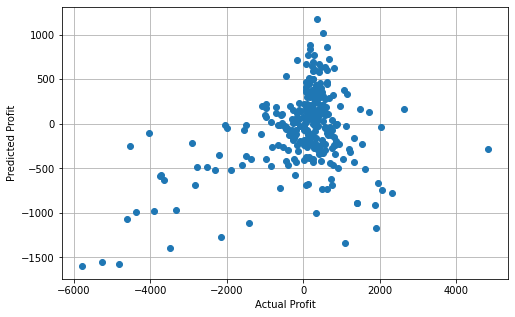

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, lasso_best_model.predict(Xsc_val), 'o')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.grid()

# **Bonus material: Creating Coefficient Plots**
We see some of the coefficients have decreased in absolute size and others have fully gone to 0. This is good to see, especially for features with high p-values (low statistical significance). We see what happens to coefficients as regularization increases:

TypeError: ignored

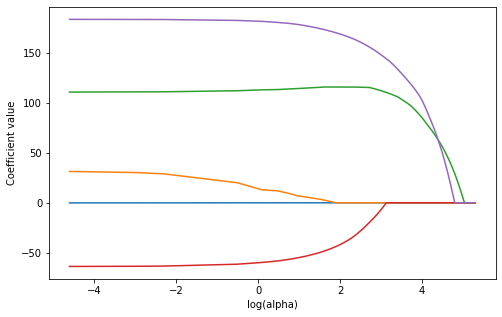

In [ ]:
alphas = [0.05,0.01,0.05] + list(np.arange(0.1,200.5,0.5))
features = ['checking_account_3','purpose_6','employment_duration_1', 'property_1', 'gender_male']
feature_dicts = {feature: {} for feature in features}
for alpha in alphas:
    lasso_model_ = Lasso(alpha=alpha)
    lasso_model_.fit(Xsc_train, y_train)
    coefs = dict(zip(X.columns, lasso_model_.coef_))
    for feature in features:
        feature_dicts[feature][alpha] = coefs[feature]

plt.figure(figsize=(8,5))
for feature, feature_dict in feature_dicts.items():
    plot_x = sorted(list(feature_dict.keys()))
    plot_y = [feature_dict[x_i] for x_i in plot_x]
    plt.plot(np.log(plot_x), plot_y, label=feature)
plt.xlabel('log(alpha)')
plt.ylabel('Coefficient value')
plt.legend();

In [ ]:
alphas = [0.05,0.01,0.05,0.1,0.5] + list(np.arange(1,25000,5))
features = ['checking_account_3','purpose_6','employment_duration_1', 'property_1', 'gender_male']
feature_dicts = {feature: {} for feature in features}
for alpha in alphas:
    ridge_model_ = Ridge(alpha=alpha)
    ridge_model_.fit(Xsc_train, y_train)
    coefs = dict(zip(X.columns, ridge_model_.coef_))
    for feature in features:
        feature_dicts[feature][alpha] = coefs[feature]

plt.figure(figsize=(8,5))
for feature, feature_dict in feature_dicts.items():
    plot_x = sorted(list(feature_dict.keys()))
    plot_y = [feature_dict[x_i] for x_i in plot_x]
    plt.plot(np.log(plot_x), plot_y, label=feature)
plt.xlabel('log(alpha)')
plt.ylabel('Coefficient value')
plt.legend(loc='upper left', frameon=False)
#plt.legend()

KeyboardInterrupt: ignored